##Dataset MNIST

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 101961230.24it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29337780.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 137605033.86it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 6157249.12it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



##Visualisasi Data MNIST

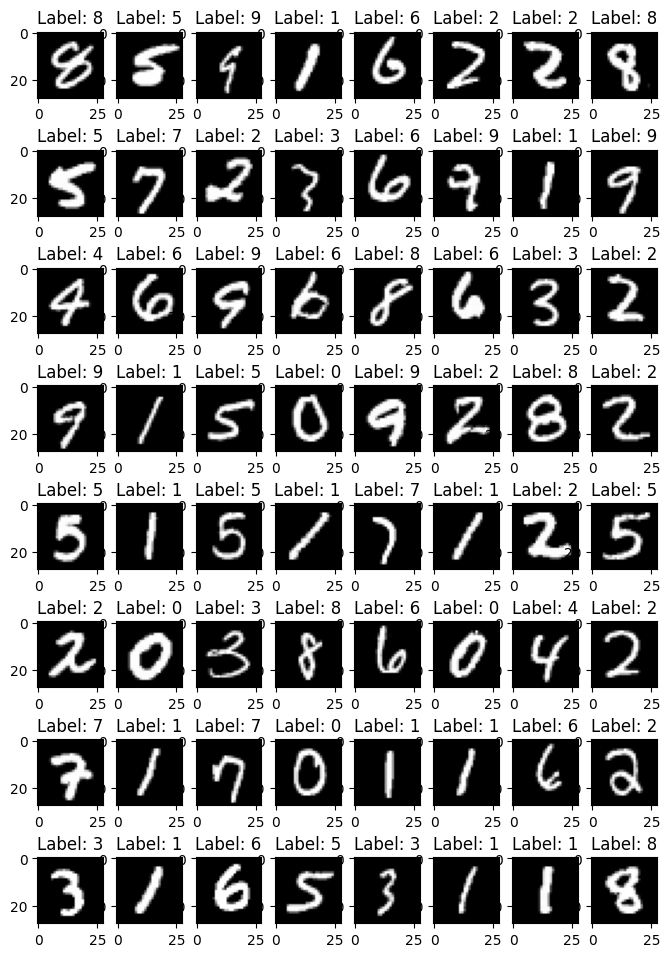

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(train_loader)
images, labels = next(dataiter)

fig, axes = plt.subplots(8, 8, figsize=(8, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
plt.show()


## Desain Model Neural Network:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()

## Pengaturan Hyperparameter:

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch = 15

## Looping untuk training model

In [ ]:
for epoch in range(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')


Epoch 1, Loss: 0.40709231402685264
Epoch 2, Loss: 0.19641581937067035
Epoch 3, Loss: 0.14589162673185596
Epoch 4, Loss: 0.11711364465185813
Epoch 5, Loss: 0.10078883893948708
Epoch 6, Loss: 0.09051658954026538
Epoch 7, Loss: 0.08150977693470333
Epoch 8, Loss: 0.07062464718570881
Epoch 9, Loss: 0.0637142210933211
Epoch 10, Loss: 0.06162471654412867
Epoch 11, Loss: 0.05632617478288694
Epoch 12, Loss: 0.05177847128913133
Epoch 13, Loss: 0.04777410576941132
Epoch 14, Loss: 0.044057977972332504
Epoch 15, Loss: 0.042736237547376495


## Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print('Akurasi: {:.2f}%'.format(accuracy * 100))
print("")

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix: ")
print(cm)
print("")

classification_rep = classification_report(all_labels, all_preds)
print('Laporan Klasifikasi:')
print(classification_rep)

Akurasi: 97.23%

Confusion Matrix: 
[[ 965    0    2    0    2    3    2    3    2    1]
 [   0 1120    2    1    0    1    0    3    6    2]
 [   0    9 1001    1    3    0    2   11    4    1]
 [   0    2    5  985    0    4    0    6    6    2]
 [   0    0    2    1  943    0    5    2    4   25]
 [   2    0    0    8    1  866    4    1    4    6]
 [   5    4    5    0   16    9  912    0    6    1]
 [   1    5    5    3    0    0    0 1004    3    7]
 [   3    1    5    5    2    2    1    4  947    4]
 [   1    1    0    2    6    1    0    9    9  980]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.96      0.96       982
           5       0.98      0.97      0.97       892
           6       0.98      0.9